# <center> Homework 5 </center>
## <center> Kishore Narendran | 14644574 | narendrk@uci.edu</center>

### Problem 1 - Basics of Clustering

##### (a) Load the usual Iris data restricted to the rst two features, and ignore the class / target variable. Plot the data and see for yourself how clustered you think it looks. 

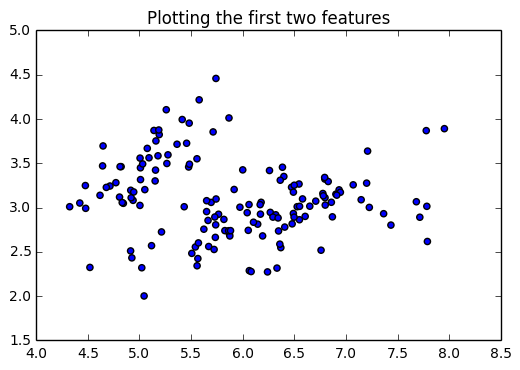

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

iris = np.genfromtxt("data/iris.txt", delimiter = None)
X = iris[:,0:-1]

# (a) Loading the first two features of the iris data set and plotting to check
#   clustering
X_two = X[:,0:2]
plt.scatter(X[:,0], X[:,1], c='b')
plt.title('Plotting the first two features')
plt.show()

##### (b) Run k-means on the data, for `k = 5` and `k = 20`. For each, turn in a plot with the data, colored by assignment, and the cluster centers. (You can easily do this yourself manually, using `ml.plotClassify2D(None,X,z)`, where `z` are the resulting cluster assignments of the data.) Try a few dierent initializations and check to see whether they find the same solution; if not, pick the one with the best score.

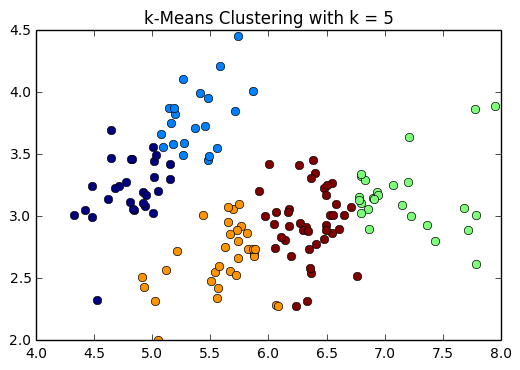

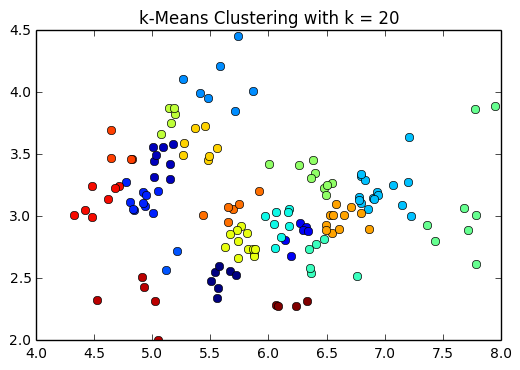

In [3]:
# (b) Running k means with k=5 and k=20 and plotting the same
k_clusters = [5, 20]
for k in k_clusters:
    (z, c, sumd) = ml.cluster.kmeans(X_two, k)
    ml.plotClassify2D(None, X_two, z)
    plt.title('k-Means Clustering with k = ' + str(k))
    plt.show()

##### (c) Run agglomerative clustering on the data, using single linkage and then again using complete linkage, each with 5 and then 20 clusters. Again, plot with color the nal assignment of the clusters, and describe their similarities and differences from each other and k-means. (This algorithm has no initialization issues; so you do not have to try multiple initializations.)

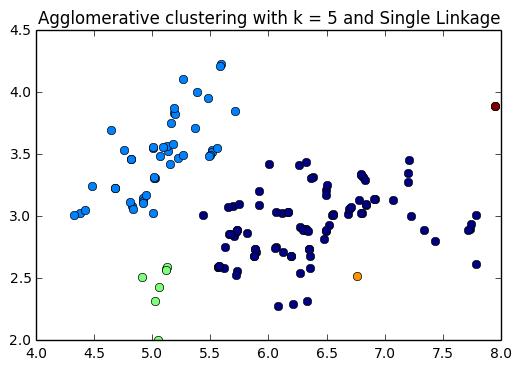

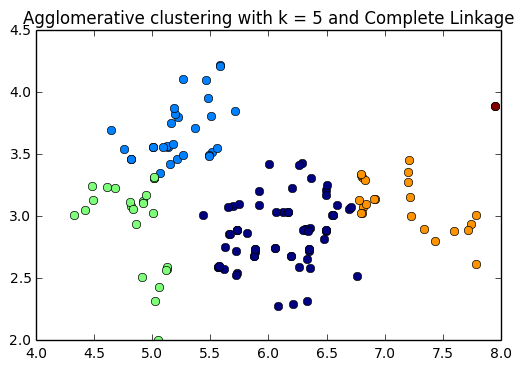

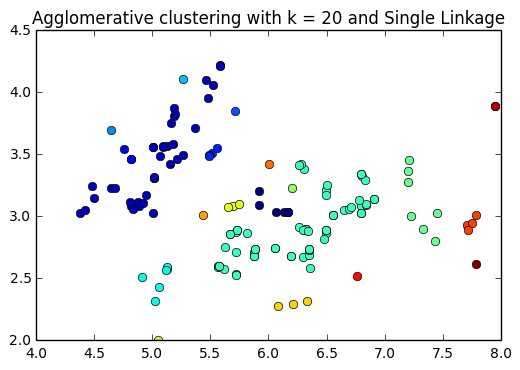

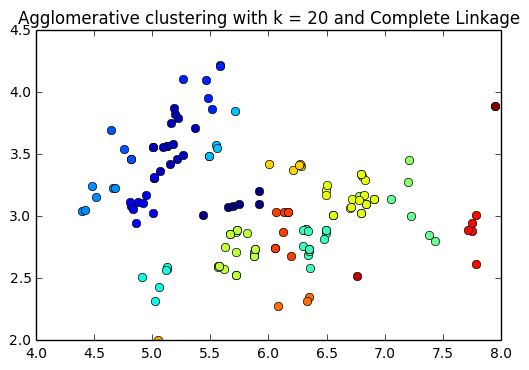

In [5]:
# (c) Running agglomerative clustering on the data with k = 5, and k = 20, with
#   with single linkage and complete linkage
linkage = {'min': 'Single Linkage', 'max': 'Complete Linkage'}
for k in k_clusters:
    for method in ['min', 'max']:
        (z, join) = ml.cluster.agglomerative(X_two, k, method=method)
        ml.plotClassify2D(None, X_two, z)
        plt.title('Agglomerative clustering with k = '+str(k) + ' and ' + linkage[method])
        plt.show()